# CrossValidation

INPUT: parameter set, either:
  - a file with parameters
  - setting to generate a uniformly distributed set



fit 3 experiments using the parameters we have.

sanity check: plotting fit for each against the data it was trained on.

then: train part 2






In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

import models.ramp
import models.transient
import models.sustained

import experiments.ramp
import experiments.transient
import experiments.sustained

from model import Model
from utils.utils import read_config, DATA_PATH, RESULTS_PATH, generate_uniform_dist_param

all_models = [
  models.ramp,
  models.transient,
  models.sustained
]

all_experiments = [
  experiments.ramp,
  experiments.transient,
  experiments.sustained,
]

all = zip(all_models, all_experiments)

param_len = len(models.ramp.param_list)
for m in all_models: assert len(m.param_list) == param_len


/Users/polya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/polya/workshop/research-project/experiments/sustained.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ex['y'] = ex.groupby('group')['frac_sub'].transform(lambda x: x / x.max())
/Users/polya/workshop/research-project/models/sustained.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['group', 'time'], as_index=False)


In [2]:


param_names = RESULTS_PATH / 'uniform.json'
#param_names = 'Sustained_v1_22-10-2025_23:23:31_L-BFGS-B.json'
default_parametrs = read_config(RESULTS_PATH / 'uniform.json', parameters=all_models[0].param_list)
#for k in default_parametrs.keys(): assert default_parametrs[k] == read_back[k]


Loaded 20 parameters from /Users/polya/workshop/research-project/results/uniform.json


a
Loaded 20 parameters from /Users/polya/workshop/research-project/results/uniform.json
a
{'config_path': '/Users/polya/workshop/research-project/results/uniform.json',
 'fit_statistics': {'aic': -731.7048687864435,
                    'bic': -667.8457317686393,
                    'degrees_of_freedom': 160,
                    'group_statistics': {'1': {'max_observed': 0.4904477634260343,
                                               'max_predicted': 0.30990654009036,
                                               'mse': 0.013742675729132427,
                                               'n_points': 180,
                                               'r_squared': 0.5204653425265227,
                                               'rmse': 0.11722915903960254}},
                    'n_data_points': 180,
                    'n_fitted_params': 20,
                    'overall_mse': 0.013742675729132427,
                    'rmse': 0.11722915903960254},
 'fitted_params': {'F12': 3.7618287

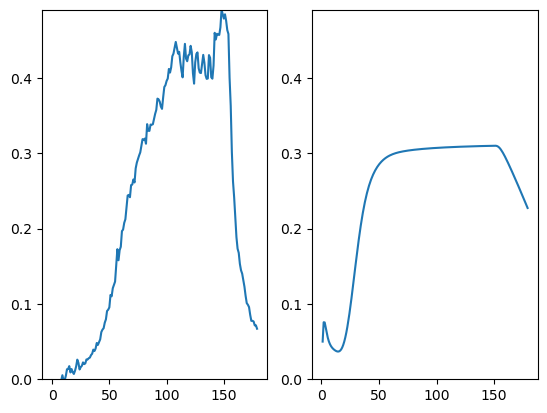

In [ ]:
# Main course


y0 = [0.05] * 5
sim_steps = 200
m = models.ramp

figs = []

for i, (model, experiment) in enumerate(list(all)):
  df:pd.DataFrame = model.df
  groups = df['group'].unique()
  fig, ax = plt.subplots(len(groups), 2, squeeze=False)
  t_max = max(df['time'])
  y_max = max(df['y'])

  lf = experiment.light_fn
  param_list = model.param_list
  states = model.nodes

  print('a')
  # control: train model on its base data - if this looks bad, maybe there's a bug in the model/light_fn.
  m = Model(
    name = f'control_{model.__name__}',
    parameters = param_list,
    states = model.nodes,
    model_definition = model.model_eqs,
    t_func = experiment.light_fn,
    t_dep = 'light'
    )
  res = m.fit(df, y0, parameters=param_names, )
  for gr_i, gr in enumerate(groups):
    dff = df[df['group'] == gr]
    ax[gr_i,0].plot(dff['time'], dff['y'],label=gr)
    ax[gr_i,0].set_ylim(0,y_max)
    sim_t = np.linspace(1, max(dff['time']), sim_steps)
    sol = m.simulate(sim_t, y0, group=gr)
    ax[gr_i,1].plot(sim_t, sol.y[-1], label='sol')
    ax[gr_i,1].set_ylim(0,y_max)
    print('a')
  figs.append(fig)
  m.save_results()


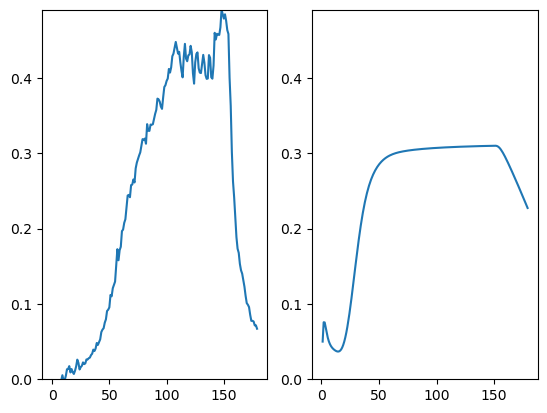

In [4]:
fig